In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('sorting_results.csv')

df

,function_name,array_length,scenario,comparisons,moves,time
0,selection_sort,10,random,45,20,0.000021
1,bubble_sort,10,random,45,58,0.000021
2,insertion_sort_exchange,10,random,29,38,0.000013
3,insertion_sort_shift,10,random,38,38,0.000012
4,selection_sort,10,random,45,20,0.000012
...,...,...,...,...,...,...
1075,insertion_sort_shift,1000,descending,500382,500382,0.133339
1076,selection_sort,1000,descending,499500,2000,0.074831
1077,bubble_sort,1000,descending,499500,998746,0.225637
1078,insertion_sort_exchange,1000,descending,499373,500372,0.134678


In [17]:
group_columns = ['function_name', 'scenario']
cal_columns = ['time', 'comparisons']

In [18]:
group_df = df.groupby(group_columns, as_index=False).agg({
    'time': 'mean',
    'comparisons': 'mean'
})

In [19]:
calculated_results = group_df[group_columns+cal_columns]

calculated_results

,function_name,scenario,time,comparisons
0,bubble_sort,ascending,0.024477,168165.000000
1,bubble_sort,descending,0.077925,168165.000000
2,bubble_sort,random,0.051691,168165.000000
3,insertion_sort_exchange,ascending,0.000099,0.000000
4,insertion_sort_exchange,descending,0.045829,168119.022222
5,insertion_sort_exchange,random,0.023462,83815.811111
6,insertion_sort_shift,ascending,0.000103,369.000000
7,insertion_sort_shift,descending,0.045760,168488.022222
8,insertion_sort_shift,random,0.023466,84184.811111
9,selection_sort,ascending,0.023976,168165.000000


In [20]:
function_names = list(calculated_results['function_name'].unique())
function_names

['bubble_sort',
 'insertion_sort_exchange',
 'insertion_sort_shift',
 'selection_sort']

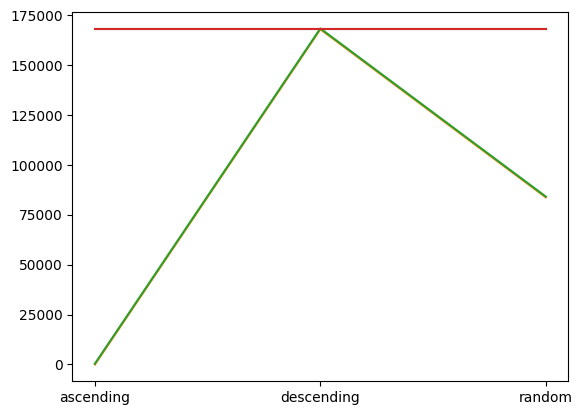

In [24]:
for function_name in function_names:
    df_plot = calculated_results[calculated_results['function_name'] == function_name]
    plt.plot(df_plot['scenario'], df_plot['comparisons'],label=function_name)